In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
foodie_df = pd.read_csv('Clean_FoodieX_data.csv')
loc_df = foodie_df.loc[:, 'Latitude':'Longitude']
loc_df

,Latitude,Longitude
0,39.262605,-85.837372
1,39.775933,-85.740581
2,39.253436,-85.123779
3,39.029841,-85.332050
4,39.882284,-85.517407
...,...,...
2014,39.624978,-85.189212
2015,39.133719,-85.503020
2016,39.662987,-85.950894
2017,39.301765,-85.662768


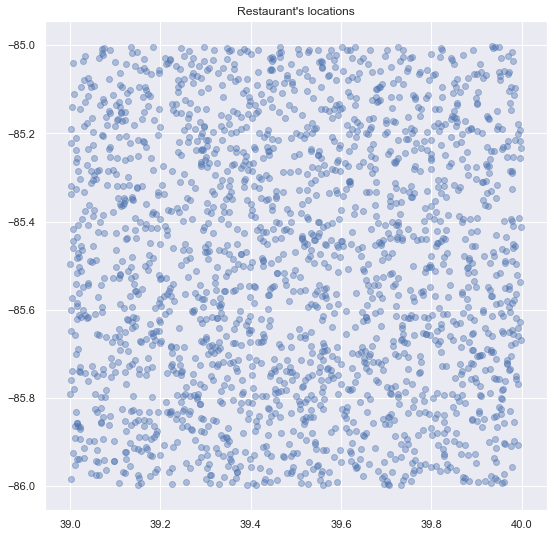

In [3]:
plt.figure(figsize=(9, 9))
plt.scatter(loc_df.Latitude, loc_df.Longitude, alpha=0.4)
plt.title("Restaurant's locations")
plt.show()

## K means clustering (when we have a predetermined number of pickup locations)

Cluster Centers: 


array([[ 39.83410992, -85.86892285],
       [ 39.16652935, -85.16507593],
       [ 39.49197648, -85.14842316],
       [ 39.19092725, -85.84744278],
       [ 39.64555027, -85.44283721],
       [ 39.84011372, -85.16917797],
       [ 39.52483159, -85.81556343],
       [ 39.36993303, -85.50234953],
       [ 39.87581772, -85.58068549],
       [ 39.11440456, -85.51946263]])

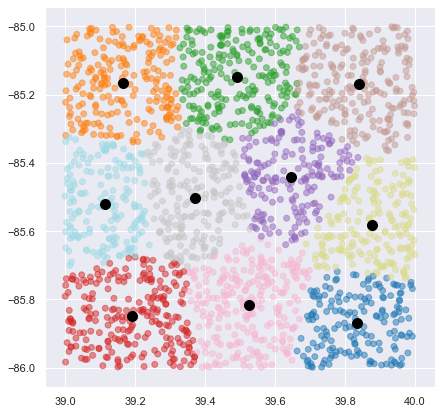

In [4]:
from sklearn.cluster import KMeans

def K_means_cluster(df, n_clusters):
    X = df.values

    K_means_est = KMeans(n_clusters)
    K_means_est.fit(X)
    
    y_kmeans = K_means_est.predict(X)
    cluster_centers = K_means_est.cluster_centers_
    
    plt.figure(figsize=(7, 7))
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=35, cmap='tab20', alpha=0.5)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=100)
    
    return cluster_centers
    
print('Cluster Centers: ')
K_means_cluster(loc_df, 10)

## Mean-shift clustering (when we don't have a predetermined number of pickup locations)

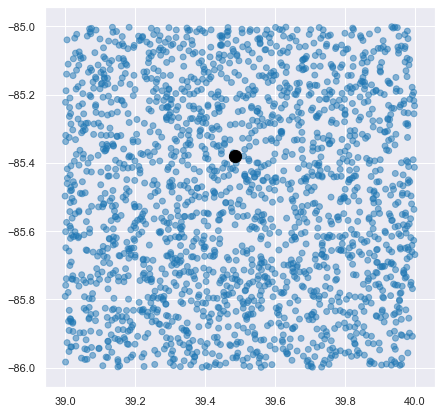

Location of Cluster Center: [[ 39.48621845 -85.37948865]]


In [5]:
from sklearn.cluster import MeanShift

X = loc_df.values
ms = MeanShift(n_jobs=-1)
ms.fit(X)

y_ms = ms.predict(X)
cluster_centers = ms.cluster_centers_
    
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_ms, s=35, cmap='tab20', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=150)
plt.show()

print('Location of Cluster Center:', cluster_centers)

**Comment:** As observed earlier, there are no evident groups of restaurants. The Mean-Shift algorithm confirms this by returning just one cluster with the center shown above.